In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='facebook/opt-350m'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'lr':[]}

In [4]:
learning_rates = [1.0e-5, 5.0e-5 ,1.0e-4]

for lr in learning_rates:
    print(f'Grid search {model_checkpoint}, learning rate {lr}')
    data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       accumulation_steps=2,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['lr'].append(lr)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search facebook/opt-350m, learning rate 1e-05


Map:   0%|          | 0/119 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.1996	Val Loss:	1.2127	Accuracy:	0.4118	F1:	0.3465
2 / 30: Train Loss:	0.6238	Val Loss:	0.9765	Accuracy:	0.4034	F1:	0.3378
3 / 30: Train Loss:	0.5025	Val Loss:	0.8033	Accuracy:	0.6387	F1:	0.6096
4 / 30: Train Loss:	0.4829	Val Loss:	0.7848	Accuracy:	0.6555	F1:	0.6205
5 / 30: Train Loss:	0.4630	Val Loss:	1.0005	Accuracy:	0.4790	F1:	0.4578
6 / 30: Train Loss:	0.4579	Val Loss:	1.4612	Accuracy:	0.4286	F1:	0.3825
7 / 30: Train Loss:	0.3965	Val Loss:	1.0058	Accuracy:	0.6387	F1:	0.6413
8 / 30: Train Loss:	0.3653	Val Loss:	1.1319	Accuracy:	0.6050	F1:	0.5928
9 / 30: Train Loss:	0.2542	Val Loss:	0.9397	Accuracy:	0.6891	F1:	0.6844
10 / 30: Train Loss:	0.2200	Val Loss:	1.1877	Accuracy:	0.6975	F1:	0.6883
11 / 30: Train Loss:	0.1828	Val Loss:	1.2942	Accuracy:	0.6891	F1:	0.6796
12 / 30: Train Loss:	0.1514	Val Loss:	1.2558	Accuracy:	0.6723	F1:	0.6691
13 / 30: Train Loss:	0.1472	Val Loss:	1.9558	Accuracy:	0.5798	F1:	0.5652
No improvement for 3 epochs. Stopping early.
best (higgest m

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.5031	Val Loss:	1.2496	Accuracy:	0.3025	F1:	0.1548
2 / 30: Train Loss:	0.5940	Val Loss:	0.9336	Accuracy:	0.5378	F1:	0.4689
3 / 30: Train Loss:	0.5140	Val Loss:	1.2618	Accuracy:	0.4874	F1:	0.4475
4 / 30: Train Loss:	0.5725	Val Loss:	1.8685	Accuracy:	0.4034	F1:	0.3217
5 / 30: Train Loss:	0.6134	Val Loss:	1.2581	Accuracy:	0.4874	F1:	0.4520
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       1.00      0.13      0.23        38
oversimplification       0.79      0.42      0.55        36
slothful induction       0.46      0.98      0.63        45

          accuracy                           0.54       119
         macro avg       0.75      0.51      0.47       119
      weighted avg       0.73      0.54      0.48       119

test results:
                    precision    recall  f1-score   support

 misrepresentation       0.80      0.18      0.30     

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.7204	Val Loss:	1.1727	Accuracy:	0.3193	F1:	0.1614
2 / 30: Train Loss:	0.6107	Val Loss:	1.2251	Accuracy:	0.3193	F1:	0.1614
3 / 30: Train Loss:	0.5815	Val Loss:	1.1821	Accuracy:	0.3193	F1:	0.1614
4 / 30: Train Loss:	0.5839	Val Loss:	1.1813	Accuracy:	0.3193	F1:	0.1614
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.32      1.00      0.48        38
oversimplification       0.00      0.00      0.00        36
slothful induction       0.00      0.00      0.00        45

          accuracy                           0.32       119
         macro avg       0.11      0.33      0.16       119
      weighted avg       0.10      0.32      0.15       119

test results:
                    precision    recall  f1-score   support

 misrepresentation       0.33      1.00      0.49        22
oversimplification       0.00      0.00      0.00        20
slothf

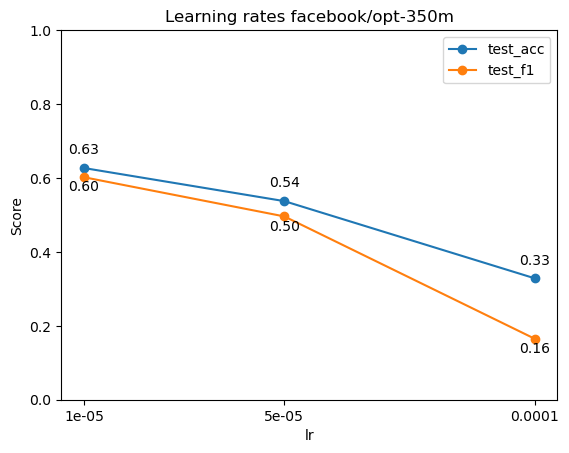

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Learning rates {model_checkpoint}',
                        column='lr',
                        sci_format=False)

In [6]:
%reset -f